This code prepare statistics and visualization for random policy

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:

def bimodal_2( x, mu1, sigma1, A1):
    def custgauss(x,mu,sigma,A):
        return A*np.exp(-(x-mu)**2/2/(sigma)**2)
    return custgauss(x,mu1,sigma1,A1)

def plot_flow_and_toll(toll_index, flow_index, toll_arr, tt_array, flow_array): 
    simulation_day = 30
    nrows = 5
    count = 0 
    # todo finish
    ncols= int(simulation_day/nrows)
    fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (45, 30)) 
    for row in range(nrows):
        for col in range(ncols): 
            current_day=count
            toll_1 = toll_arr[toll_index][current_day]
            tollparameters = np.array([toll_1[0]*60, toll_1[1]*60, toll_1[2]])
            timeofday = np.arange(12*60) # the toll fees of the day
            toll_profile_1 = np.round(np.repeat(np.maximum(bimodal_2(timeofday[np.arange(0, 12*60, 1)], *tollparameters),0),1), 2)
            label_context_1 = 'mu: '+str(int(toll_1[0]))+ ',sigma: '+ str(int(toll_1[1]))+ ',A: '+ str(int(toll_1[2]))
            axs[row, col].plot(np.arange(0,720)/60, toll_profile_1[np.arange(0,720)], color='red', label = label_context_1)
            axs[row, col].legend(loc= 'upper left', fontsize= 20)
            axs[row, col].set_ylim(0,6)

            ax_2 =  axs[row, col].twinx()
            prob = np.histogram(flow_array[flow_index][current_day][:, 0], bins =144, range = (0, 720))[0]
            label_flow = "flow \n"+" ITT: "+str(np.round(tt_array[toll_index][current_day], 2))
            ax_2.plot(np.arange(0,720, 5)/60, prob, color='black', label = label_flow)
            ax_2.set_ylim(0,320)
            #axs[row, col].legend()
            ax_2.legend(fontsize = 20, loc="upper right")
            count = count+1
    plt.tight_layout()
    fig_name = "../Plot/RL/toll_and_flow_"+str(toll_index)+".png"
    plt.savefig(fig_name)

In [3]:
model_path = "PPO_Wed Sep 20 20:43:00 2023" # 1s-dim action
model_step = 100
toll_arr_0 = np.load(file=("../results/"+model_path+"/test_result/"+str(model_step)+"_ppo_toll.npy"))
rw_arr_0 = np.load(file=("../results/"+model_path+"/test_result/"+str(model_step)+"_ppo_rw.npy"))
tt_arr_0 = np.load(file=("../results/"+model_path+"/test_result/"+str(model_step)+"_ppo_tt.npy"))
action_arr_0 = np.load(file=("../results/"+model_path+"/test_result/"+str(model_step)+"_ppo_action.npy"))
sw_arr_0 = np.load(file=("../results/"+model_path+"/test_result/"+str(model_step)+"_ppo_sw.npy"))
price_arr_0 = np.load(file=("../results/"+model_path+"/test_result/"+str(model_step)+"_ppo_price.npy"))
flow_arr_0 =  np.load(file=("../results/"+model_path+"/test_result/"+str(model_step)+"_ppo_flow.npy"))
tt_last_5_day_arr_0 = np.load(file=("../results/"+model_path+"/test_result/"+str(model_step)+"_ppo_tt_last_5_day.npy"))
convergence_arr_0 = np.load(file=("../results/"+model_path+"/test_result/"+str(model_step)+"_ppo_convergence.npy"))

In [5]:
120*1+420

540

In [6]:
toll_arr_0[:, :, 0]= (toll_arr_0[:,:, 0])/60
toll_arr_0[:, :, 1]= (toll_arr_0[:,:, 1])/60

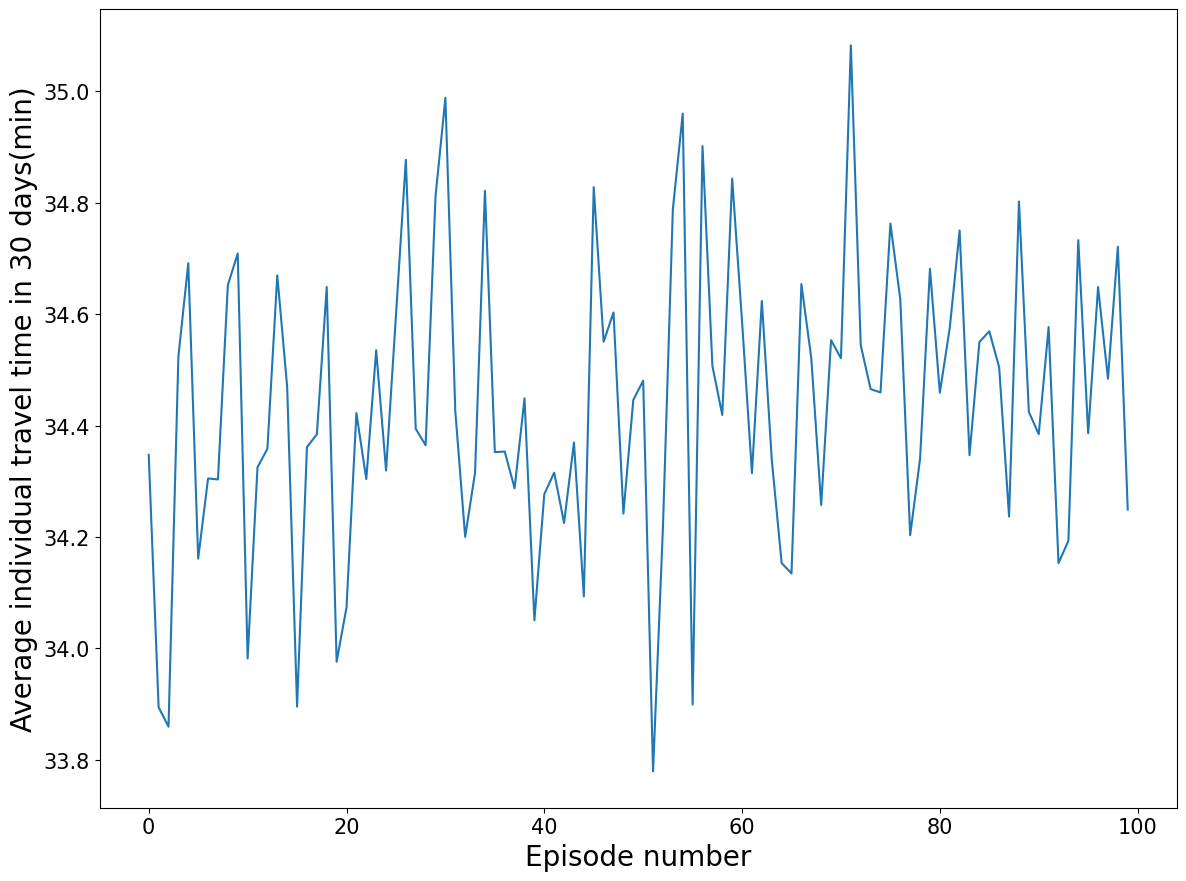

In [7]:
fig, ax = plt.subplots(figsize=(12,9))
tt_mean_0 = np.mean(tt_arr_0, axis=1)
plt.ylabel("Average individual travel time in 30 days(min)", fontsize=20)
plt.xlabel("Episode number",fontsize=20)
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)
# fig.savefig(folder+'/'+figname, dpi=fig.dpi)
plt.tight_layout()
plt.plot(tt_mean_0)

(100,)


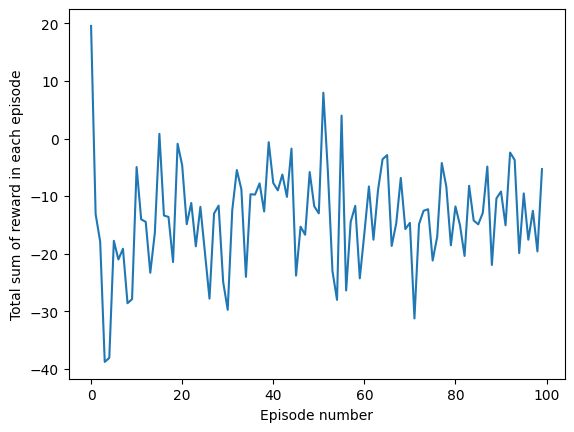

In [8]:

rw_sum_0 = np.sum(rw_arr_0, axis=1)
plt.ylabel("Total sum of reward in each episode")
plt.xlabel("Episode number")
print(rw_sum_0.shape)
plt.plot(rw_sum_0)

In [9]:
min_index = np.argmin(tt_last_5_day_arr_0)
print(" min_index ", min_index)

max_index = np.argmax(tt_last_5_day_arr_0)
print(" max_index ", max_index)

mean_index = -6
print(" mean_index ", mean_index)


 min_index  51
 max_index  88
 mean_index  -6


In [10]:
from tabulate import tabulate
#create data
data = [["Worst", np.max(tt_last_5_day_arr_0), np.min(rw_sum_0), np.argmax(tt_last_5_day_arr_0)], 
        ["Mean", np.mean(tt_last_5_day_arr_0), np.mean(rw_sum_0), " "], 
        ["std", np.std(tt_last_5_day_arr_0), np.std(rw_sum_0), " "], 
        ["Best", np.min(tt_last_5_day_arr_0), np.max(rw_sum_0),np.argmin(tt_last_5_day_arr_0)]]
  
#define header names
col_names = [" ", "AITT", "Espisode reward", "Episode index"]

print(tabulate(data, headers=col_names))

            AITT    Espisode reward  Episode index
-----  ---------  -----------------  ---------------
Worst  34.8116            -38.8291   88
Mean   34.073             -13.6637
std     0.333457            8.99913
Best   32.9115             19.5777   51


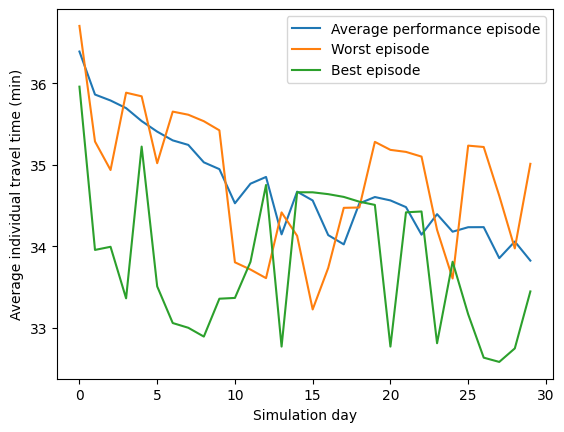

In [11]:
# plt.plot(tt_arr_0[-1])
plt.plot(tt_arr_0[mean_index], label="Average performance episode")
plt.plot(tt_arr_0[max_index],  label="Worst episode")
# plt.plot(tt_arr_0[-4])
label_txt = "best performance (" + str(min_index)+"th) episode"
plt.plot(tt_arr_0[min_index], label="Best episode")
plt.ylabel("Average individual travel time (min)")
plt.xlabel("Simulation day")
plt.legend(loc="upper right")

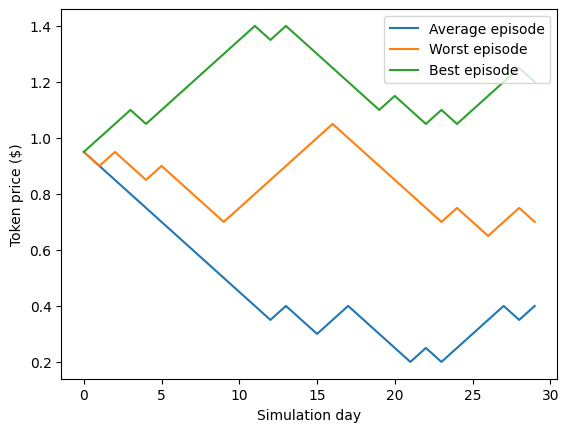

In [12]:
# plt.plot(tt_arr[-1])
plt.plot(price_arr_0[mean_index], label="Average episode")
plt.plot(price_arr_0[max_index],  label="Worst episode")
# plt.plot(price_arr_0[-4])
label_txt = "best performance (" + str(min_index)+"th) episode"
plt.plot(price_arr_0[min_index], label="Best episode")
plt.ylabel("Token price ($)")
plt.xlabel("Simulation day")
plt.legend(loc="upper right")

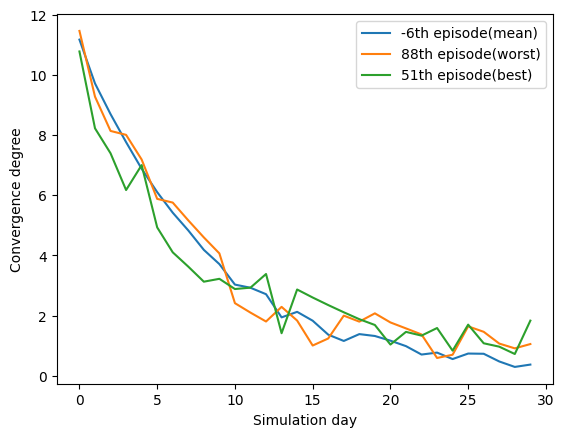

In [13]:
mean_txt = str(mean_index)+"th episode(mean)"
worst_txt = str(max_index)+"th episode(worst)"
best_txt = str(min_index)+"th episode(best)"

plt.plot(convergence_arr_0[mean_index], label =mean_txt)
plt.plot(convergence_arr_0[max_index],  label= worst_txt)
plt.plot(convergence_arr_0[min_index], label=best_txt)
plt.ylabel("Convergence degree")
plt.xlabel("Simulation day")
plt.legend(loc="upper right")

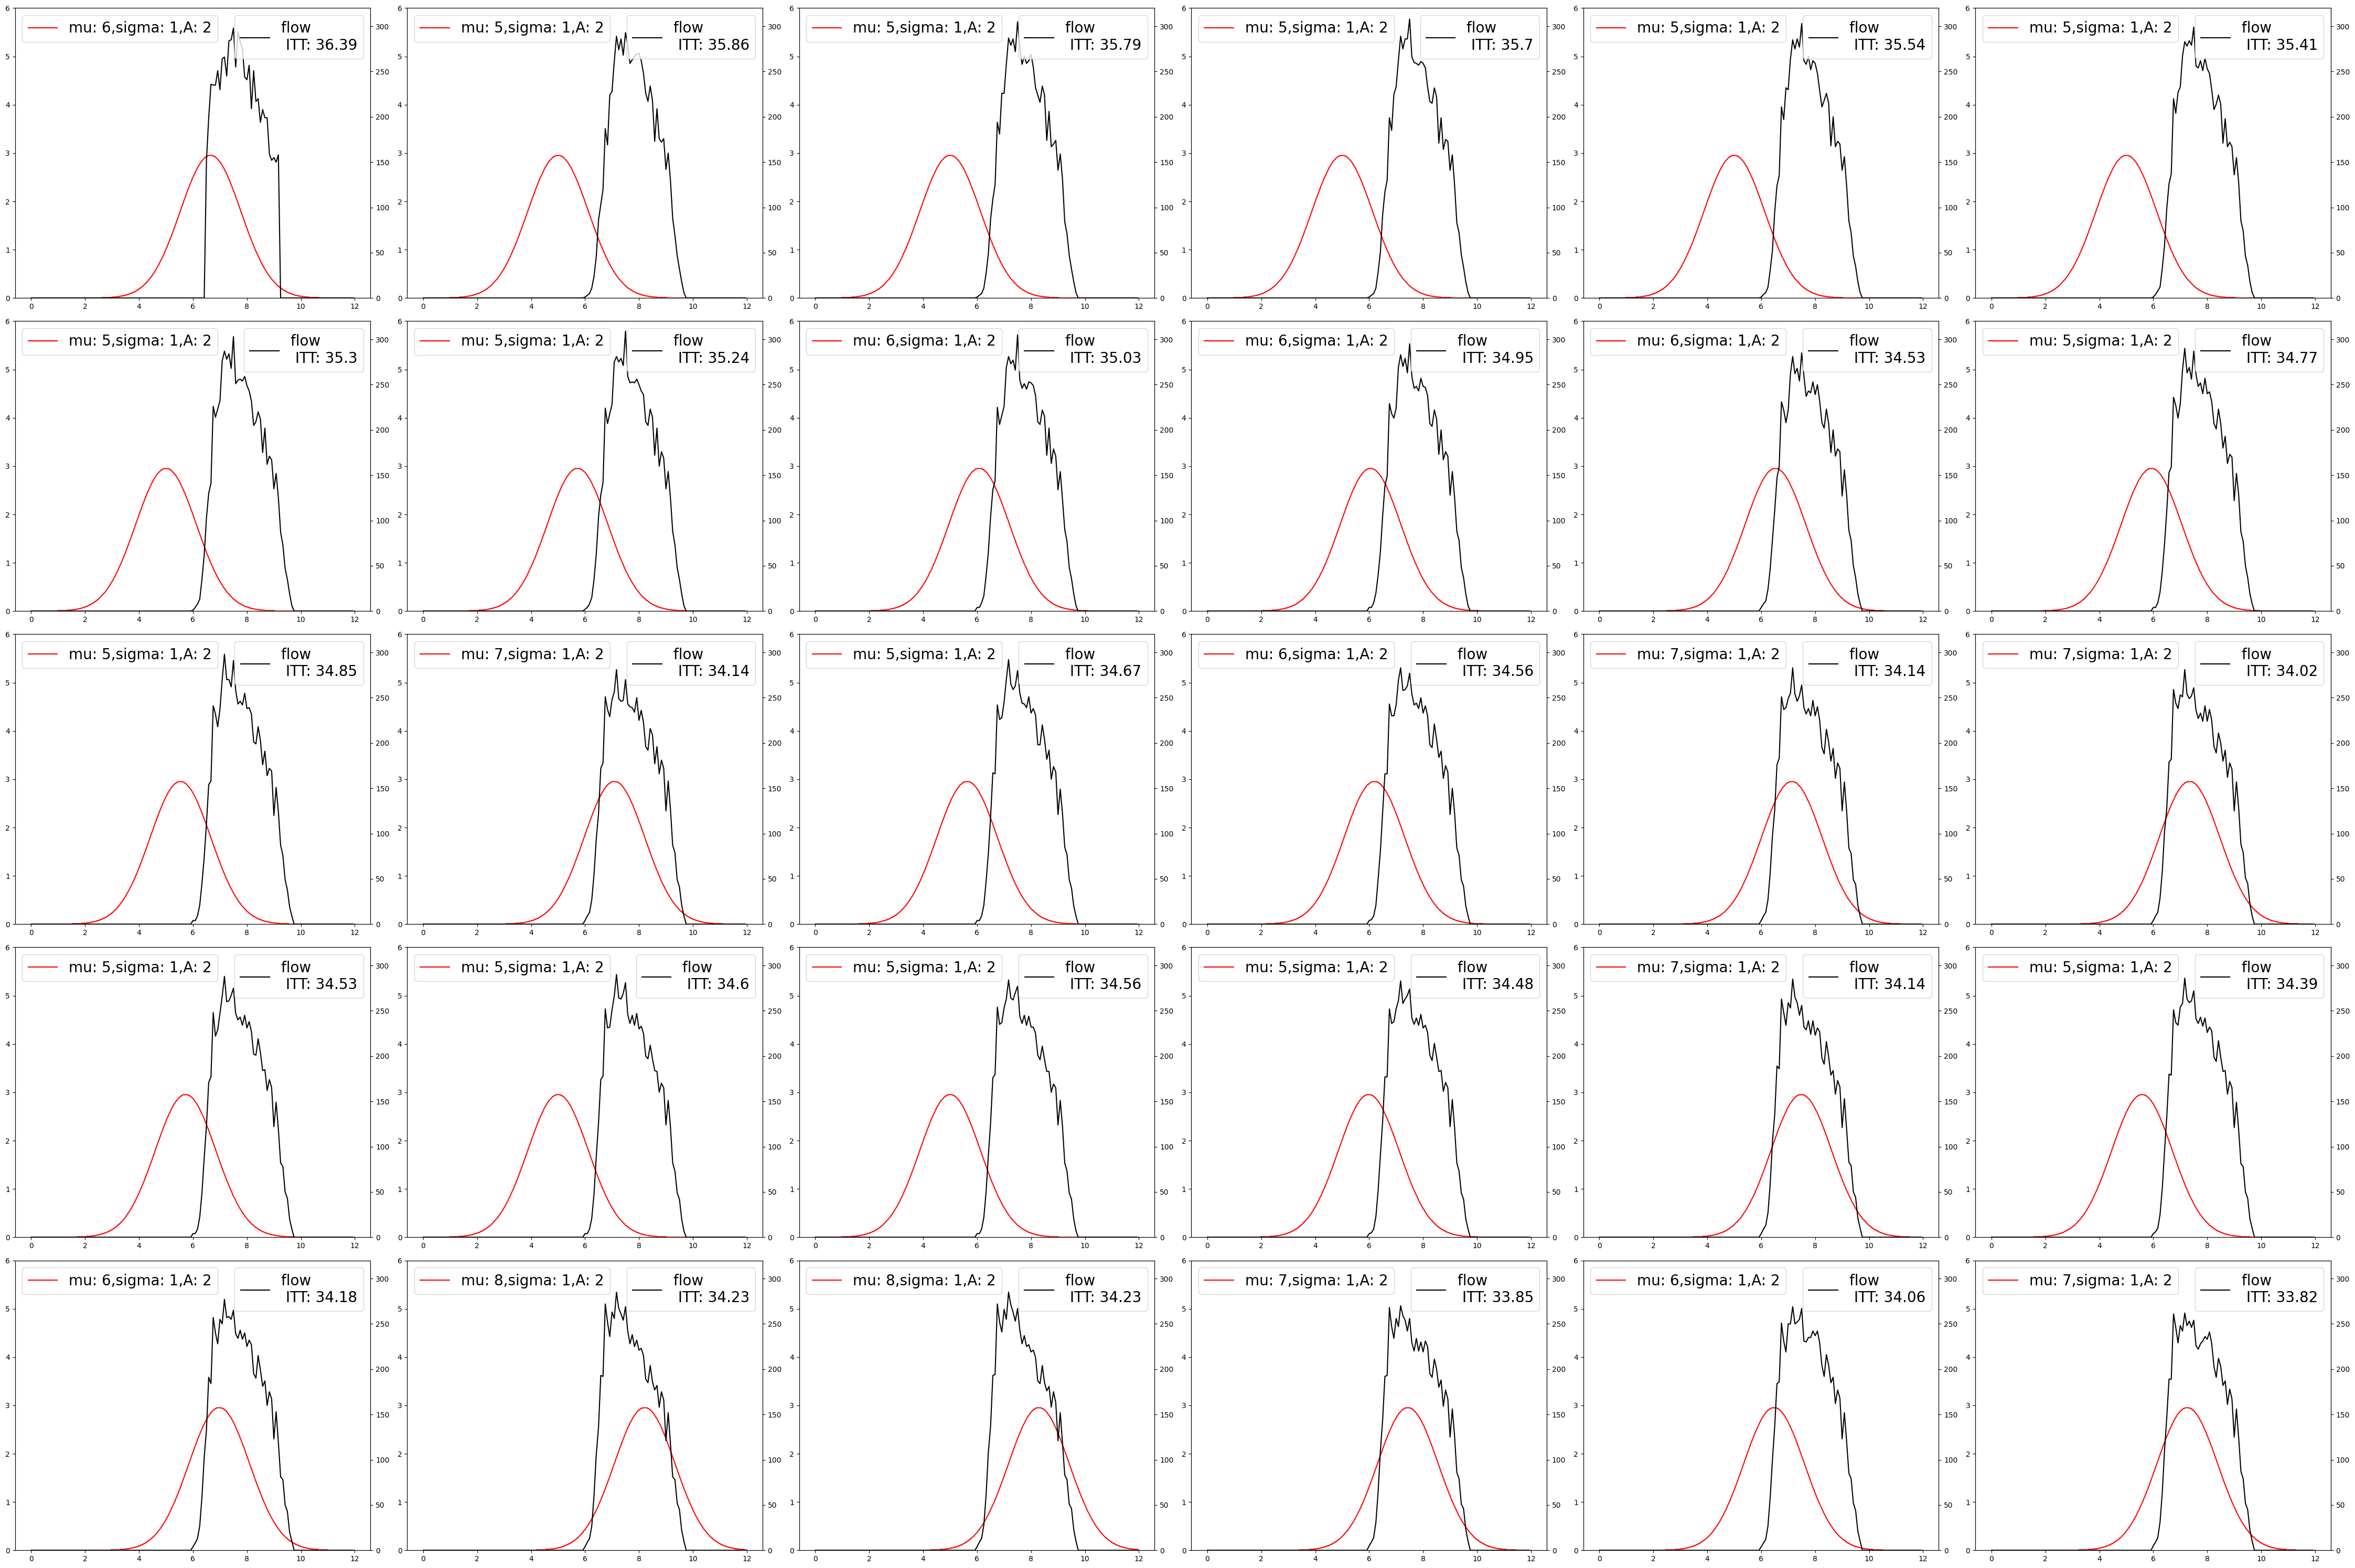

In [12]:
plot_flow_and_toll(mean_index, mean_index, toll_arr_0,tt_arr_0, flow_arr_0)

In [14]:
toll_arr_0[min_index]

array([[6.47778953, 1.12702313, 2.95469884],
       [8.29307533, 1.12702313, 2.95469884],
       [7.01374985, 1.12702313, 2.95469884],
       [7.96896727, 1.12702313, 2.95469884],
       [6.07681651, 1.12702313, 2.95469884],
       [7.19449742, 1.12702313, 2.95469884],
       [7.71416409, 1.12702313, 2.95469884],
       [7.83130545, 1.12702313, 2.95469884],
       [7.53459773, 1.12702313, 2.95469884],
       [8.27903149, 1.12702313, 2.95469884],
       [8.32097589, 1.12702313, 2.95469884],
       [8.55642656, 1.12702313, 2.95469884],
       [9.        , 1.12702313, 2.95469884],
       [7.9866389 , 1.12702313, 2.95469884],
       [9.        , 1.12702313, 2.95469884],
       [9.        , 1.12702313, 2.95469884],
       [9.        , 1.12702313, 2.95469884],
       [9.        , 1.12702313, 2.95469884],
       [9.        , 1.12702313, 2.95469884],
       [9.        , 1.12702313, 2.95469884],
       [7.83055139, 1.12702313, 2.95469884],
       [9.        , 1.12702313, 2.95469884],
       [9.

In [15]:
action_arr_0[min_index]

array([[-0.15247624],
       [ 0.9076429 ],
       [-0.63966274],
       [ 0.4776087 ],
       [-0.9460754 ],
       [ 0.55884045],
       [ 0.25983334],
       [ 0.05857068],
       [-0.14835386],
       [ 0.37221688],
       [ 0.0209722 ],
       [ 0.11772534],
       [ 0.70815897],
       [-0.50668055],
       [ 0.6380662 ],
       [ 0.49238446],
       [ 0.37420043],
       [ 0.6136625 ],
       [ 0.9215819 ],
       [ 0.2566203 ],
       [-0.5847243 ],
       [ 0.6592963 ],
       [ 0.10670289],
       [-0.86770594],
       [ 0.67085373],
       [-0.8374494 ],
       [ 0.34134614],
       [ 0.00864211],
       [ 0.17631684],
       [-0.6411531 ]], dtype=float32)

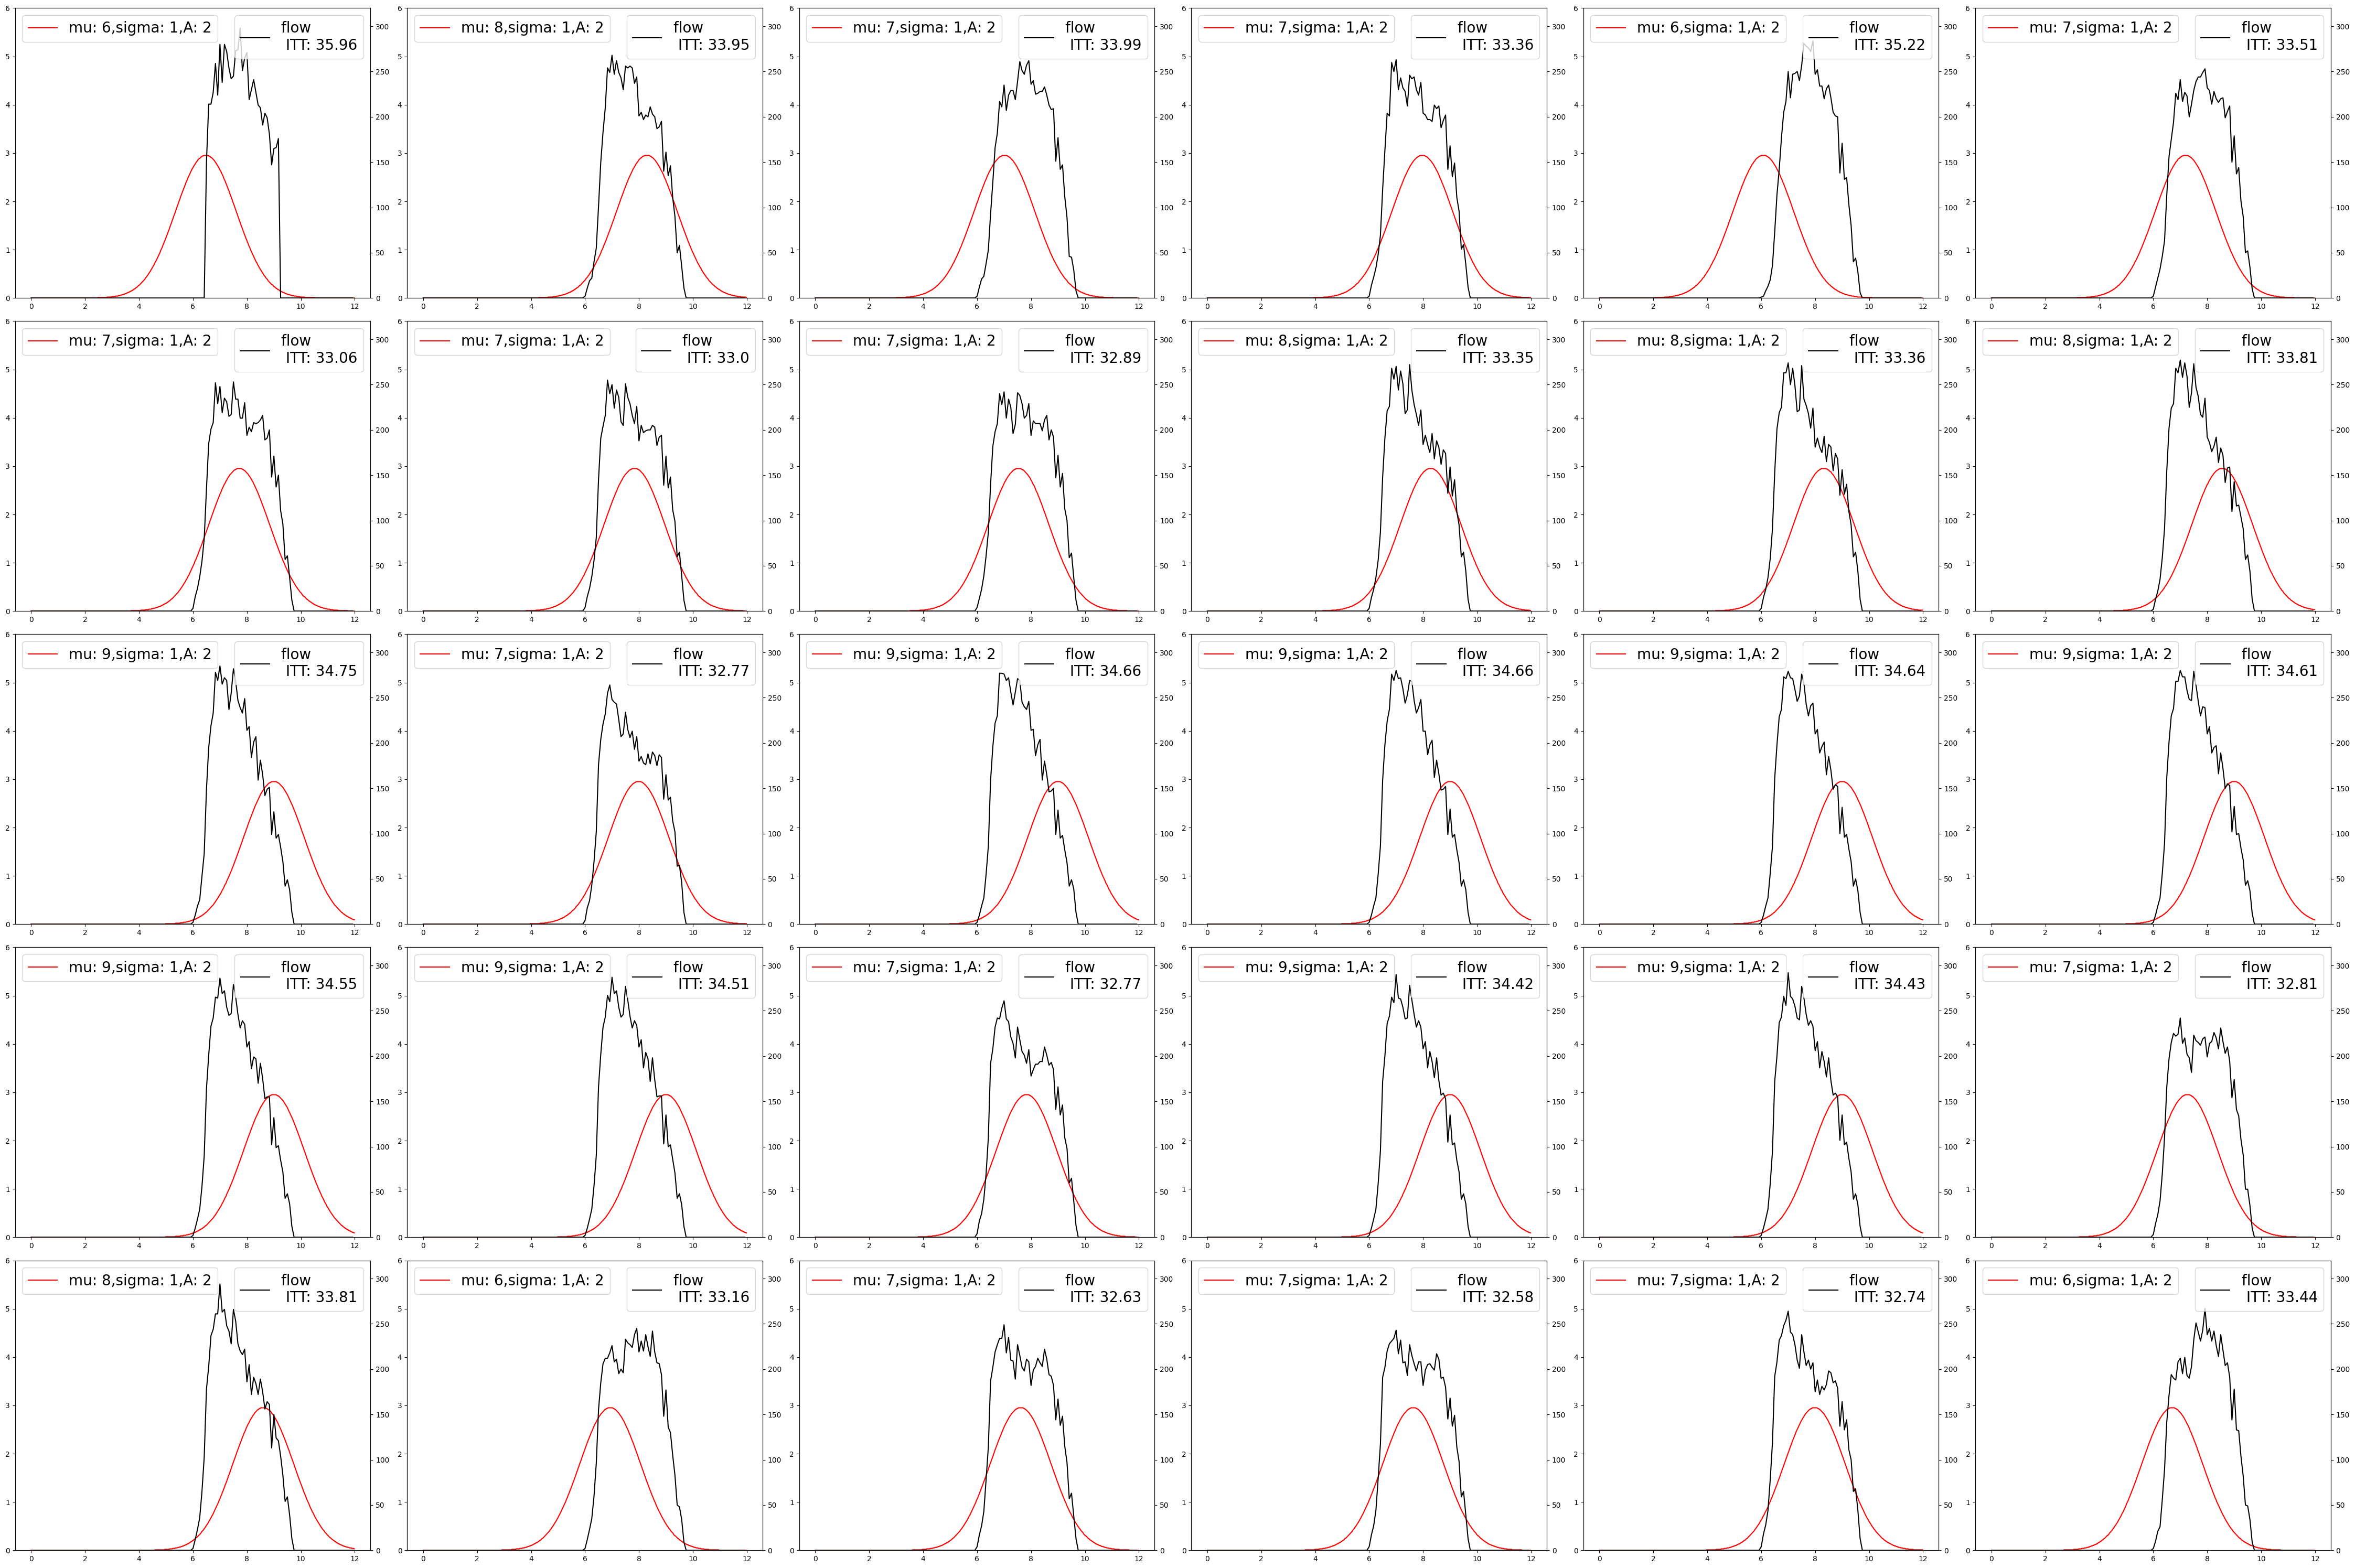

In [18]:
plot_flow_and_toll(min_index, min_index, toll_arr_0,tt_arr_0, flow_arr_0)